[View in Colaboratory](https://colab.research.google.com/github/ckbjimmy/2018_mlw/blob/master/nb2_clustering.ipynb)

# Machine Learning for Clinical Predictive Analytics

We would like to introduce the basic knowledge of machine learning and toolkits for clinical knowledge discovery in the workshop.
The material will cover common classification and clustering algorithms for clinical prediction tasks, as well as the diagnostic workflow of applying machine learning to real-world problems. 
We will use [Google colab](https://colab.research.google.com/) / python jupyter notebook and two datasets:

- Breast Cancer Wisconsin (Diagnostic) Database, and 
- pre-extracted ICU data from PhysioNet Database
  
to build predictive models.

The learning objectives of this workshop tutorial are:

- Learn how to use Google colab / jupyter notebook
- Learn how to build machine learning models for clinical classification and clustering tasks

To accelerate the progress without obstacles, we hope that the readers fulfill the following prerequisites:

- [Skillset] basic python syntax
- [Requirements] Google account OR [anaconda](https://anaconda.org/anaconda/python)

In part 1, we will go through the basic of modeling for classification.
In part 2, we will investigate more on unsupervised learning methods for clustering and visualization.
In part 3, we will play with neural networks.


# Part II – Unsupervised learning algorithms

In part 2, we will investigate more on unsupervised learning algorithms of clustering and dimensionality reduction.

In the first part of the workshop, we introduce many algorithms for classification tasks. 
Those tasks belong to the scenario of **supervised learning**, which means that the label/annotation of the training set are given. 
Now we will dive into the other scenario called **unsupervised learning**, which is for finding the patterns inside data.
In such scenario, the data do not need to be labelled, and we just need the input variables/features without any outcome variables.
Unsupervised learning algorithms will try to discover the pattern and inner structure of the data by itself, and group the **similar** data points together and form a cluster, or compress high dimension data to lower dimension data representation.

The difference between supervised and unsupervised learning can be rougly shown in the following picture.

![unsup](http://adgefficiency.com/wp-content/uploads/2017/04/super_unsuper_reinf-1.png)

[Source] http://adgefficiency.com/energy_py-reinforcement-learning-for-energy-systems/

Again, we start from the breast cancer dataset in UCI data repository to have a quick view on how to do the analysis and build models using well-structured data. 
We load the breast cancer dataset from `sklearn.datasets`, and preprocess the dataset as we did in Part I.

We visualize the data in the vector space just using the data in the first two columns.

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


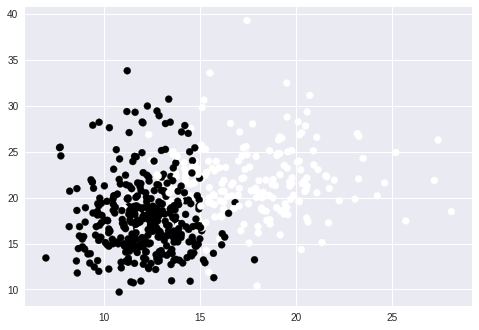

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt

df_bc = datasets.load_breast_cancer()
print(df_bc.feature_names)
print(df_bc.target_names)

X = df_bc['data']
y = df_bc['target']

label = {0: 'malignant', 1: 'benign'}

x_axis = X[:, 0] # mean radius
y_axis = X[:, 1] # mean texture

plt.scatter(x_axis, y_axis, c=y)
plt.show()

## Clustering

We are now going to use clustering algorithms to cluster data points into several groups. 

### K-means clustering

K-means clustering is an iterative algorithm that aims to find local maxima in each iteration. 
In k-means, we need to choose the number of clusters, K, beforehand.

There are many methods to decide K value if it is unknown. 
The simplest approach is that we can use elbow (bend) method in the sum of squared error screen plot for deciding K value. 
The elbow point can be suggested as the number of culsters for k-means.

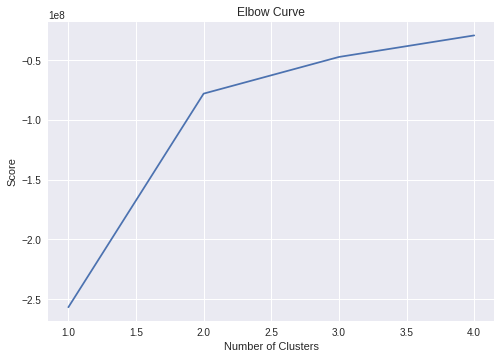

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

Nc = range(1, 5)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Since we already know that there are two classes in our dataset, we then pass the value of 2 to the parameter `n_clusters` in our model.

Based on the centroid distance between each points, the next given inputs are segregated into respected clusters. 
Each centroid of a cluster is a collection of feature values which define the resulting groups. 
Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represent.

We use confusion matrix to demonstrate the performance of k-means clustering. 
The accuracy of the model can be computed by the summation of diagonal (or reverse diagonal) elements divided by the sample size.
In our case, $\frac{(356+130)}{(82+356+130+1)} = 0.85$.

Here we use `PCA` for visualization of higher dimension data. 
We will introduce it later in the section of dimensionality reduction.


[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

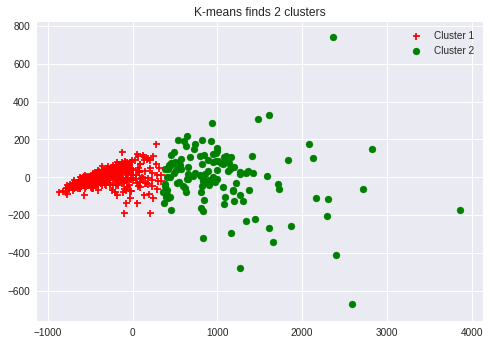

[[ 82 130]
 [356   1]]


In [32]:
k = 2
km = KMeans(n_clusters=k)
km.fit(X)
print(km.labels_)

pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif km.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')

plt.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
plt.title('K-means finds 2 clusters')
plt.show()

cm = confusion_matrix(y, km.labels_) 
print(cm)

### DBSCAN clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is another clustering algorithm.
You need to decide the value of `eps` (maximum distance between two data points to be considered in the same neighborhood) and `min_samples` (minimum amount of data points in a neighborhood to be considered a cluster for DBSCAN, but number of clusters is not needed to be decided.

[-1 -1  0  1  0  1  0  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1
 -1 -1  1 -1  1  1  0 -1  1 -1  1  1  1  1  1  1  1  1  0  1  1  0  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
 -1  1  1  1  1  0  0  1  1  1 -1 -1  1  0  1  0  1  1  1  1  1  1  1  0
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  0 -1  1  1  1  1  0  1  0  1  1  1  1  0  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0 -1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  0  1  1  1  1  1
  1  1  1  1  1  1  0  1  1  1 -1 -1  1  1  1  1  1  1  0  1 -1 -1  1  1
  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1 -1  0  1  1
  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1 -1  1 -1  1  1  1  0  1  1  1
 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  0  1  0  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  0  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  0  1  1  1  0  1 -1  1  1  1  1  1

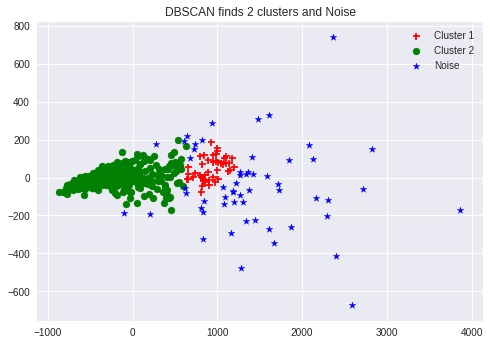

[[  0   0   0]
 [ 56  44 112]
 [  0   0 357]]


In [30]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

dbscan = DBSCAN(eps=100, min_samples=10)
dbscan.fit(X)
print(dbscan.labels_)

pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

cm = confusion_matrix(y, dbscan.labels_) 
print(cm)

## Dimensionality reduction

Dimensionality reduction methods can reduce the number of features and represent the data with much smaller, compressed representation.

The technique is helpful for analyzing sparse data that have an issue of curse of dimensionality. 
Here we will introduce two commonly seen algorithms for dimensionality reduction, principal component analysis (PCA) and t-distributed stochastic neighbor embedding (t-SNE).


### Principal component analysis (PCA)

PCA guarantees finding the best linear transformation that reduces the number of dimensions with a minimum loss of information. 
Sometimes the information that was lost is regarded as noise – information that does not represent the phenomena we are trying to model, but is rather a side effect of some usually unknown processes.

In the example, we preserve the first two principal components (PC1 and PC2) and visualize the data after PCA transformation.
The figure shows that PCA compresses the data from 30-dimension to 2-dimension without lossing the information to separate data points with different outcomes.

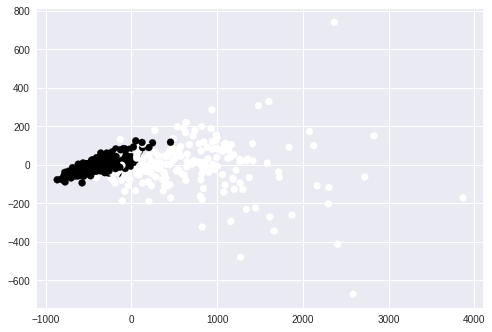

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

x_axis = pca_2d[:, 0]
y_axis = pca_2d[:, 1]

plt.scatter(x_axis, y_axis, c=y)
plt.show()

We can even use the result of PCA transformation to perform classification task (just simply use logistic regression as an example) with much smaller data.
The results show that using PCA transformed data for classification does not decrease too much on performance.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# use all
clf = LogisticRegression(fit_intercept=True)
clf.fit(X, y)
yhat = clf.predict_proba(X)[:,1]
auc = metrics.roc_auc_score(y, yhat)
print('{:0.3f} - AUROC of model (training set).'.format(auc))

# use PCA
clf = LogisticRegression(fit_intercept=True)
clf.fit(pca_2d, y)
yhat = clf.predict_proba(pca_2d)[:,1]
auc = metrics.roc_auc_score(y, yhat)
print('{:0.3f} - AUROC of model (training set).'.format(auc))

0.995 - AUROC of model (training set).
0.978 - AUROC of model (training set).


### t-SNE (t-distributed stochastic neighbor embedding)

PCA utilizes the linear transformation of data. 
However, it would be better to consider non-linearity for data with higher dimension.
t-SNE is one of the unsupervised learning method for higher dimension data visualization. 
It adopts the idea of manifold learning of modeling each high-dimensional data point by a lower dimensional data point in such a way that similar objects are modeled by nearby points with high probability.

Again, we use the result of t-SNE modeling and realize that it still preserve most of the information inside the data for classification.

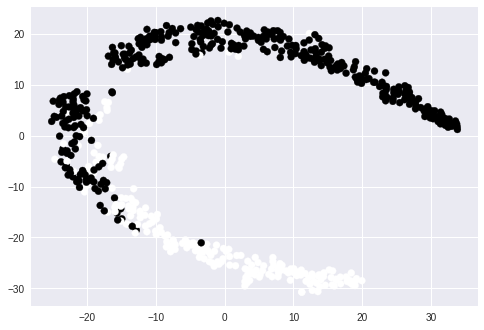

In [19]:
from sklearn.manifold import TSNE

ts = TSNE(learning_rate=100)
tsne = ts.fit_transform(X)

x_axis = tsne[:, 0]
y_axis = tsne[:, 1]

plt.scatter(x_axis, y_axis, c=y)
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# use all
clf = LogisticRegression(fit_intercept=True)
clf.fit(X, y)
yhat = clf.predict_proba(X)[:,1]
auc = metrics.roc_auc_score(y, yhat)
print('{:0.3f} - AUROC of model (training set).'.format(auc))

# use tSNE
clf = LogisticRegression(fit_intercept=True)
clf.fit(tsne, y)
yhat = clf.predict_proba(tsne)[:,1]
auc = metrics.roc_auc_score(y, yhat)
print('{:0.3f} - AUROC of model (training set).'.format(auc))

0.995 - AUROC of model (training set).
0.954 - AUROC of model (training set).


## Exercise


### Iris dataset

Try to use iris dataset!
We show the result of using k-means for iris dataset. 
Please try to modify the above codes to see what will happen when you apply DBSCAN, PCA and t-SNE on this dataset.



['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


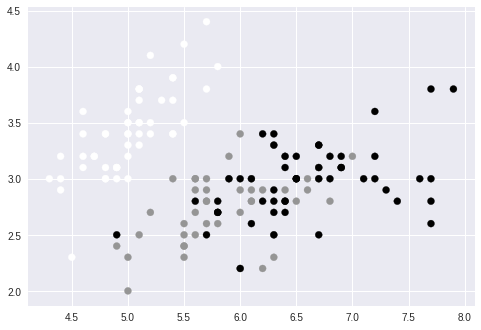

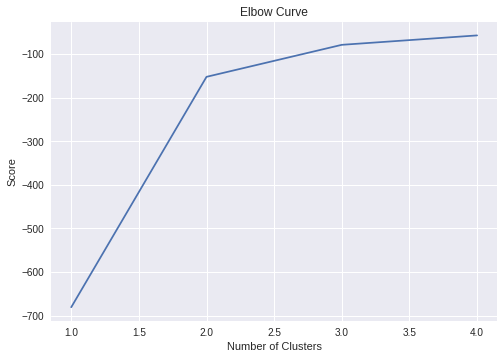

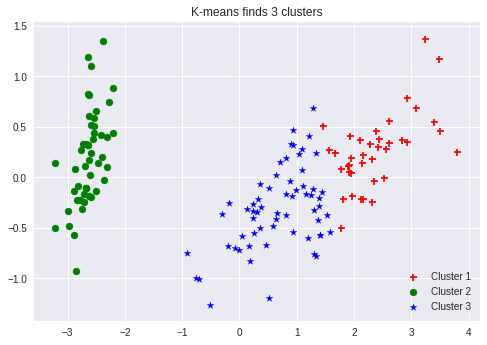

[[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]


In [42]:
df = datasets.load_iris()
print(df.feature_names)
print(df.target_names)

X = df['data']
y = df['target']

label = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

x_axis = X[:, 0]
y_axis = X[:, 1]

plt.scatter(x_axis, y_axis, c=y)
plt.show()

Nc = range(1, 5)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

k = 3
km = KMeans(n_clusters=k)
km.fit(X)

pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif km.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif km.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('K-means finds 3 clusters')
plt.show()

cm = confusion_matrix(y, km.labels_) 
print(cm)

### PhysioNet dataset

How about PhysioNet dataset?
It seems like that the quality of unsupervised model is not good enough.
This may because of significant reduction of dimension, which yield loss of information.




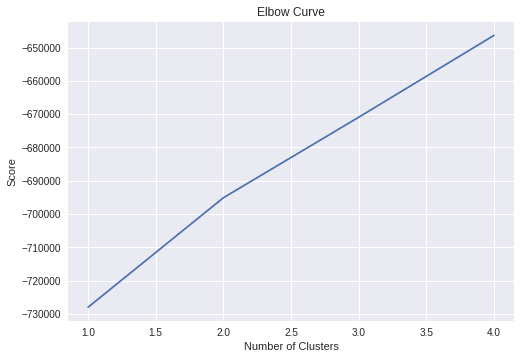

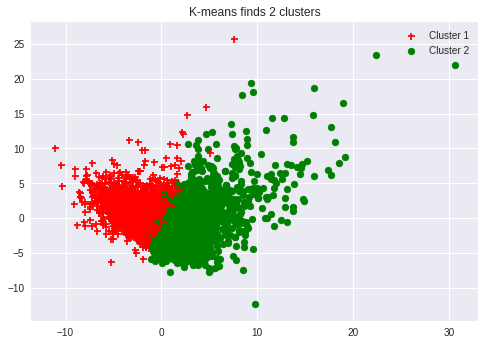

[[1938 1508]
 [ 209  345]]
0.881 - AUROC of model (training set).
0.688 - AUROC of model (training set).


In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('https://raw.githubusercontent.com/ckbjimmy/2018_mlw/master/data/PhysionetChallenge2012_data.csv')
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

X = Imputer(missing_values='NaN', strategy='mean', axis=0).fit(X).transform(X)
X = StandardScaler().fit(X).transform(X)

Nc = range(1, 5)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

k = 2
km = KMeans(n_clusters=k)
km.fit(X)

pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif km.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')

plt.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
plt.title('K-means finds 2 clusters')
plt.show()

cm = confusion_matrix(y, km.labels_) 
print(cm)

# use all
clf = LogisticRegression(fit_intercept=True)
clf.fit(X, y)
yhat = clf.predict_proba(X)[:,1]
auc = metrics.roc_auc_score(y, yhat)
print('{:0.3f} - AUROC of model (training set).'.format(auc))

# use PCA
clf = LogisticRegression(fit_intercept=True)
clf.fit(pca_2d, y)
yhat = clf.predict_proba(pca_2d)[:,1]
auc = metrics.roc_auc_score(y, yhat)
print('{:0.3f} - AUROC of model (training set).'.format(auc))

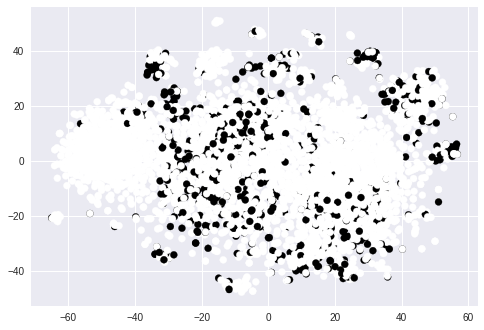

0.881 - AUROC of model (training set).
0.527 - AUROC of model (training set).


In [51]:
ts = TSNE(learning_rate=200)
tsne = ts.fit_transform(X)

x_axis = tsne[:, 0]
y_axis = tsne[:, 1]

plt.scatter(x_axis, y_axis, c=y)
plt.show()

# use all
clf = LogisticRegression(fit_intercept=True)
clf.fit(X, y)
yhat = clf.predict_proba(X)[:,1]
auc = metrics.roc_auc_score(y, yhat)
print('{:0.3f} - AUROC of model (training set).'.format(auc))

# use tSNE
clf = LogisticRegression(fit_intercept=True)
clf.fit(tsne, y)
yhat = clf.predict_proba(tsne)[:,1]
auc = metrics.roc_auc_score(y, yhat)
print('{:0.3f} - AUROC of model (training set).'.format(auc))

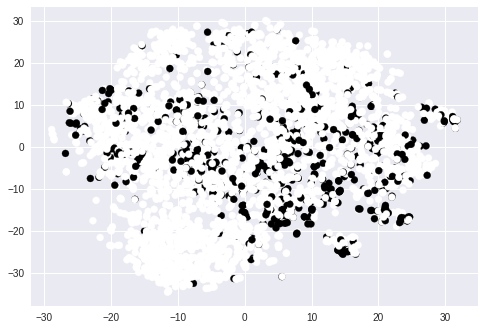

0.881 - AUROC of model (training set).
0.618 - AUROC of model (training set).


In [52]:
pca_16 = PCA(n_components=16).fit(X).transform(X)
tsne = TSNE(learning_rate=200).fit_transform(pca_16)

x_axis = tsne[:, 0]
y_axis = tsne[:, 1]

plt.scatter(x_axis, y_axis, c=y)
plt.show()

# use all
clf = LogisticRegression(fit_intercept=True)
clf.fit(X, y)
yhat = clf.predict_proba(X)[:,1]
auc = metrics.roc_auc_score(y, yhat)
print('{:0.3f} - AUROC of model (training set).'.format(auc))

# use tSNE
clf = LogisticRegression(fit_intercept=True)
clf.fit(tsne, y)
yhat = clf.predict_proba(tsne)[:,1]
auc = metrics.roc_auc_score(y, yhat)
print('{:0.3f} - AUROC of model (training set).'.format(auc))

## More unsupervised learning algorithms

- Anomaly detection
- Autoencoders
- Generative Adversarial Networks (GAN)
- ...